___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.shape

(200, 5)

In [7]:
df.rename(columns = {"CustomerID":"customerid", "Gender":"gender", "Age":"age", "Annual Income (k$)": "annual_income", "Spending Score (1-100)":"spending_score"},inplace=True)

In [8]:
df.head(1)

,customerid,gender,age,annual_income,spending_score
0,1,Male,19,15,39


In [9]:
df.customerid.nunique()

200

In [10]:
df.drop(columns="customerid", inplace=True)

In [11]:
df.head(1)

,gender,age,annual_income,spending_score
0,Male,19,15,39


---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [12]:
df.describe()

,age,annual_income,spending_score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


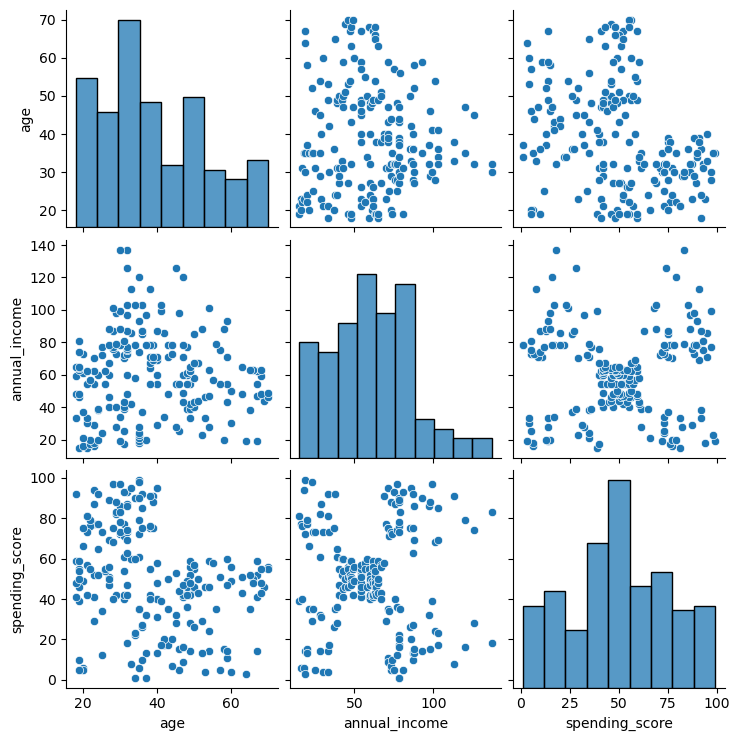

In [13]:
sns.pairplot(df)
plt.show()

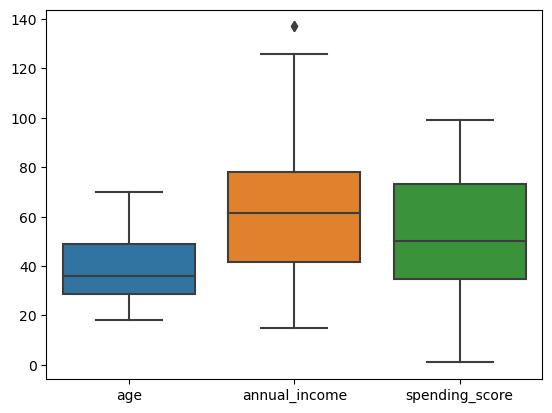

In [14]:
sns.boxplot(df)
plt.show()

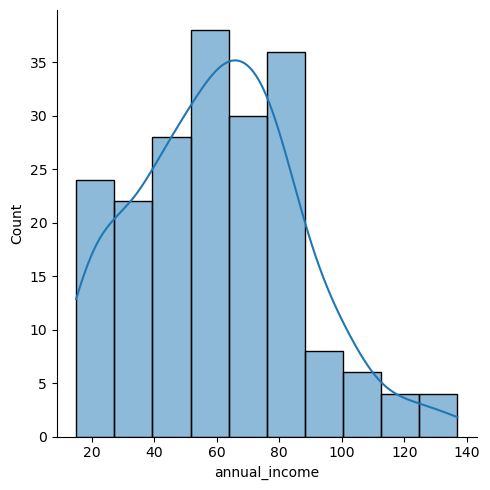

In [15]:
sns.displot(df.annual_income, kde = True);

In [16]:
df[df.annual_income > 115].annual_income.value_counts()

120    2
126    2
137    2
Name: annual_income, dtype: int64

In [17]:
df[df.annual_income > 115].annual_income.value_counts().sum()/df.shape[0] #less than 10%- maybe drop to improve result later

0.03

Text(0.5, 1.0, 'Correlation Matrix')

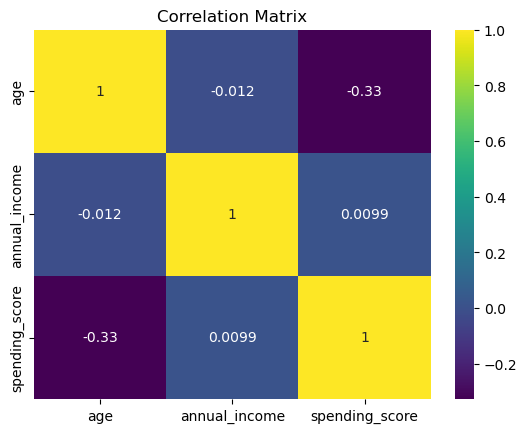

In [18]:
sns.heatmap(df.select_dtypes("number").corr(),annot=True, cmap='viridis')
plt.title("Correlation Matrix")

In [19]:
df.gender = df.gender.map({"Male":0, "Female":1})

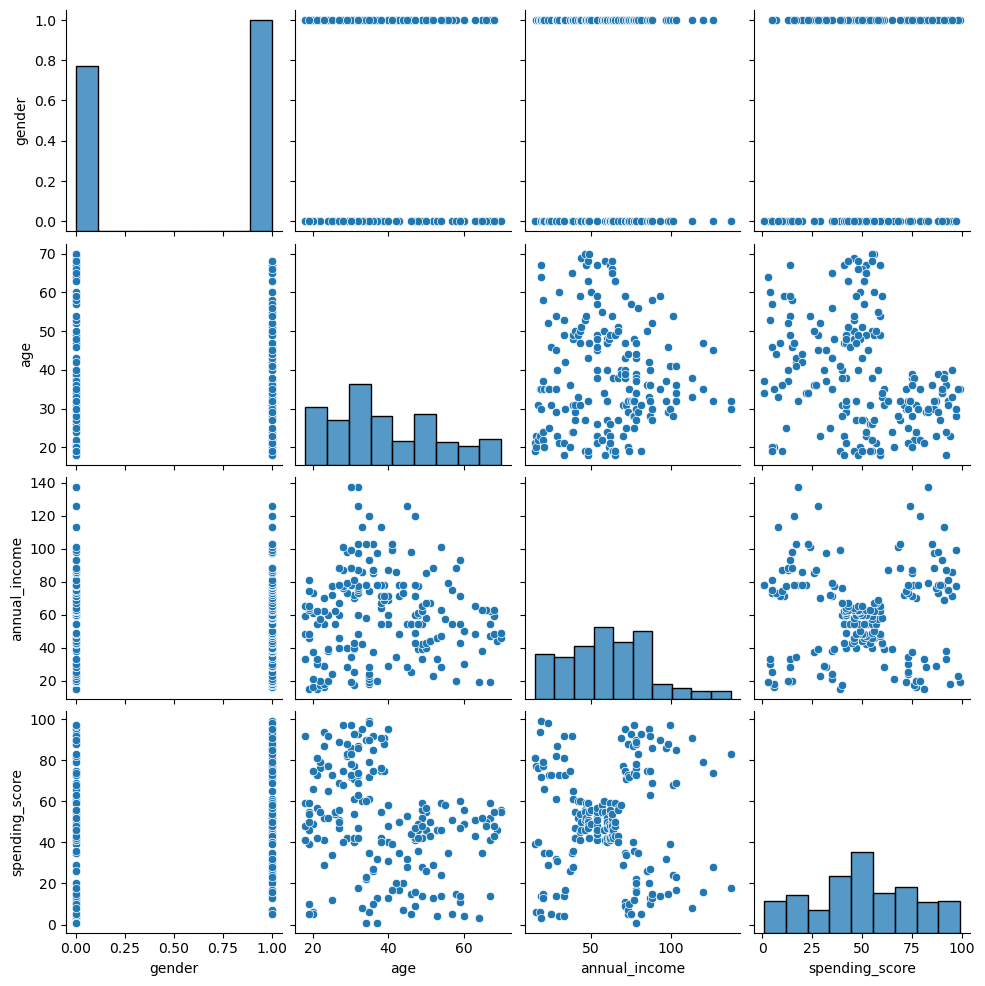

In [20]:
sns.pairplot(df)
plt.show()

In [21]:
df.drop(columns = "gender", inplace=True)

In [22]:
df.shape

(200, 3)

In [23]:
X = df.copy()

In [24]:
X.shape

(200, 3)

## Scale the data

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().set_output(transform="pandas")

In [26]:
X_scaled = scaler.fit_transform(X)

In [27]:
X_scaled.head()

,age,annual_income,spending_score
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959


In [28]:
X_scaled.describe()

,age,annual_income,spending_score
count,200.000000,200.000000,200.000000
mean,0.400962,0.373443,0.502041
std,0.268635,0.215285,0.263505
min,0.000000,0.000000,0.000000
25%,0.206731,0.217213,0.344388
50%,0.346154,0.381148,0.500000
75%,0.596154,0.516393,0.734694
max,1.000000,1.000000,1.000000


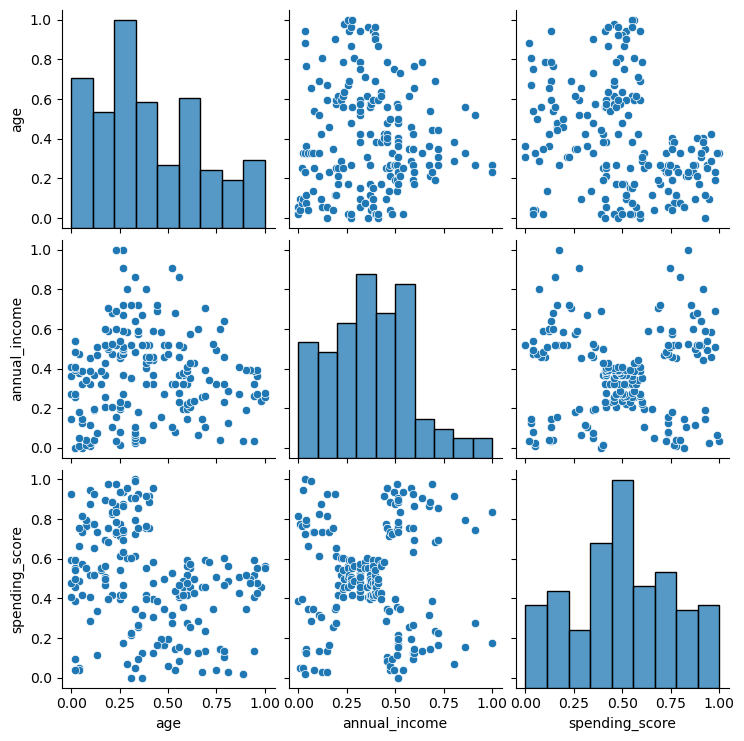

In [29]:
sns.pairplot(X_scaled);

---
---

## 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

In [30]:
#check algorithm and hyper parameters
# class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init='warn', max_iter=300, 
#                              tol=0.0001, verbose=0, random_state=None, 
#                              copy_x=True, algorithm='lloyd')

#### *i. Create a new dataset with two variables of your choice*

In [31]:
X_AS = X_scaled[['age', 'spending_score']]
X_AS.head()

,age,spending_score
0,0.019231,0.387755
1,0.057692,0.816327
2,0.038462,0.051020
3,0.096154,0.775510
4,0.250000,0.397959


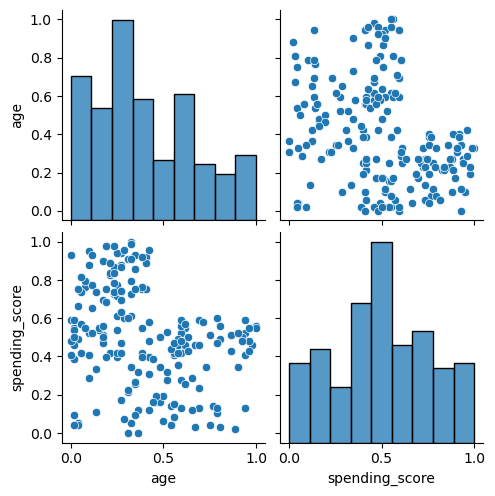

In [32]:
sns.pairplot(X_AS); #two clusters

#### *ii. Determine optimal number of clusters*

In [33]:
from sklearn.cluster import KMeans

#### Hopkins Test 

In [34]:
from sklearn.neighbors import BallTree
import numpy as np
import pandas as pd


def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception("The number of sample of sample is bigger than the shape of D")
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(
        min_data_frame[0], max_data_frame[0], sampling_size
    )
    uniformly_selected_values_1 = np.random.uniform(
        min_data_frame[1], max_data_frame[1], sampling_size
    )
    uniformly_selected_observations = np.column_stack(
        (uniformly_selected_values_0, uniformly_selected_values_1)
    )
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(
                min_data_frame[i], max_data_frame[i], sampling_size
            )
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception("The denominator of the hopkins statistics is null")
    return x / (x + y)[0]


# Normally this function is available in pyclustertend's hopkins library.
# However, we will use the function itself to avoid any errors that may occur.

In [35]:
X_AS.shape

(200, 2)

In [36]:
hopkins(X_AS, X_AS.shape[0])

# We can say that hopkins 0 is data suiatable for clustering.
# If the data were too large,
# we could also specify a sampling_size here instead of X.shape[0].
# The reason for different results each time it is run;
# is that it receives random observations from X in the background.

0.2957444795466374

In [37]:
hopkins(X_AS, 100)

0.34299067600382305

#### Elbow Method

In [38]:
ssd = []

K = range(1, 10)

for k in K:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(X_AS)
    ssd.append(model.inertia_)
    #print(model.labels_)

Text(0.5, 1.0, 'elbow method')

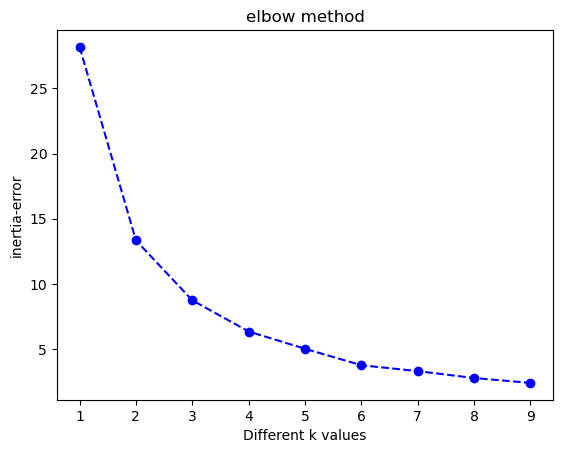

In [39]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")

In [40]:
ssd  # sum of squared distance

[28.17833784431536,
 13.337690580804235,
 8.742042168276534,
 6.3502463191224745,
 5.026143351352525,
 3.762796809327069,
 3.310446181738137,
 2.781552120356593,
 2.406636281222873]

In [41]:
-pd.Series(ssd).diff() #dramatic decrease is at step occurs when k change from 1 to 2

0          NaN
1    14.840647
2     4.595648
3     2.391796
4     1.324103
5     1.263347
6     0.452351
7     0.528894
8     0.374916
dtype: float64

#### Distorsion (different from sklearn- we are averaging ssd)

In [42]:
# check this again X_AS.iloc[1:10,:]
K = range(1, 10)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeanModel.fit(X_AS)
    distances = kmeanModel.transform(
        X_AS
    )  # distances from each observation to each cluster centroid
    #print(distances) # Transform X to a cluster-distance space.
    labels = kmeanModel.labels_
    #print(labels)
    result = []
    for i in range(k):
        cluster_distances = distances[
            labels == i, i
        ]  # distances from observations in each cluster to their own centroid
        #print(cluster_distances)
        result.append(
            np.mean(cluster_distances**2)
        )  # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
    distortion.append(
        sum(result)
    )  # sum the means of all clusters and add it to the distortion list

Text(0.5, 1.0, 'elbow method')

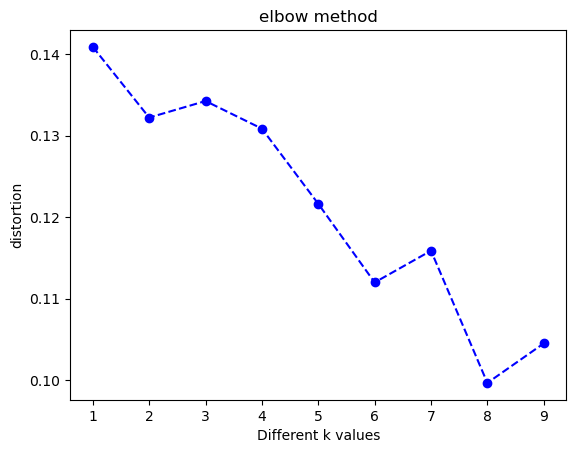

In [43]:
plt.plot(K, distortion, "bo--")
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")

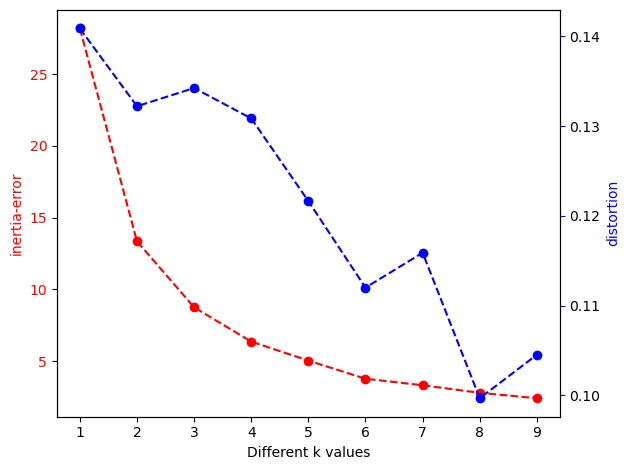

In [44]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Different k values')
ax1.set_ylabel("inertia-error", color='red')
ax1.plot(K, ssd, 'ro--')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("distortion", color='blue')  # we already handled the x-label with ax1
ax2.plot(K, distortion, 'bo--')
ax2.tick_params(axis='y', color='blue')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

### Silhouette analysis

#### Why silhouette_score is negative?

![image.png](attachment:image.png)

In [45]:
from sklearn.metrics import silhouette_score

# silhouette_score ; It is a metric that measures the quality of our clustering.
# When calculating, both inter cluster distance and intra cluster distance are taken into account.
# ranges -1 to 1, bad to good respectively.

In [46]:
range_n_clusters = range(2, 9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    kmeans.fit(X_AS)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_AS, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.47252865228696783
For n_clusters=3, the silhouette score is 0.44058221683010546
For n_clusters=4, the silhouette score is 0.4288271307195917
For n_clusters=5, the silhouette score is 0.44625330587100703
For n_clusters=6, the silhouette score is 0.45615225386265235
For n_clusters=7, the silhouette score is 0.40578335793980225
For n_clusters=8, the silhouette score is 0.4169908111029726


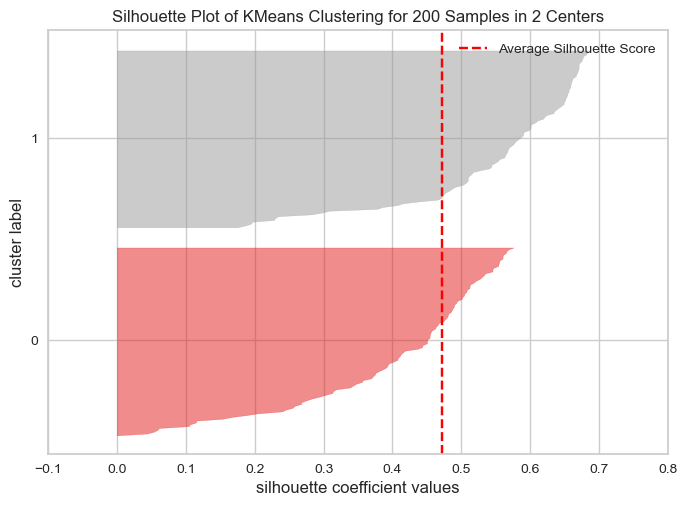

In [47]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=2, random_state=42, n_init=10)  # we decided n_clusters=2!
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X_AS)  # Fit the data to the visualizer
visualizer.poof();

# With this feature of yellowbrick, we can see the silhouette scores of each cluster separately.

#### *iii. Apply K Means*

In [48]:
from sklearn.cluster import KMeans

model_final_AS = KMeans(n_clusters=2, random_state=42, n_init=10)  # we decided n_clusters=2

model_final_AS.fit(X_AS)


KMeans(n_clusters=2, n_init=10, random_state=42)

In [49]:
model_final_AS.predict(X_AS)

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [50]:
X_AS["predicted_clusters"] = model_final_AS.labels_

In [51]:
X_AS.head(5)

,age,spending_score,predicted_clusters
0,0.019231,0.387755,1
1,0.057692,0.816327,1
2,0.038462,0.051020,0
3,0.096154,0.775510,1
4,0.250000,0.397959,1


#### *iv. Visualizing and Labeling All the Clusters*

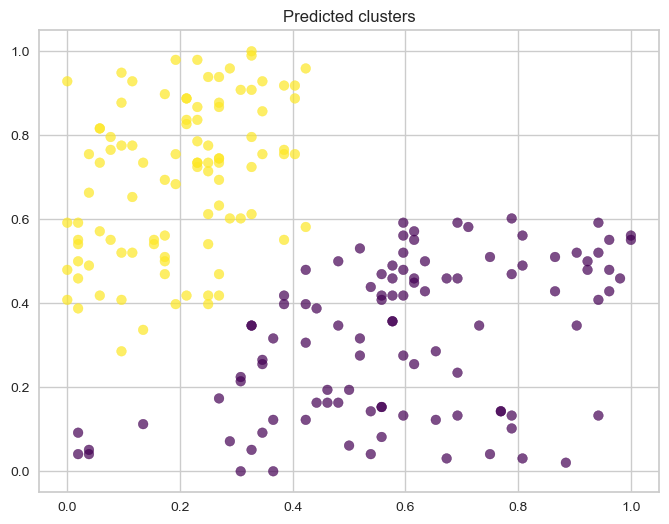

In [52]:
plt.figure(figsize=(8, 6))
plt.scatter(
    X_AS["age"],
    X_AS["spending_score"],
    c=X_AS.predicted_clusters,
    cmap="viridis",
    alpha=0.7,
)
plt.title("Predicted clusters");

In [53]:
centers_AS = model_final_AS.cluster_centers_
centers_AS
# coordinates of centorids

array([[0.59092606, 0.31820884],
       [0.19924663, 0.69724385]])

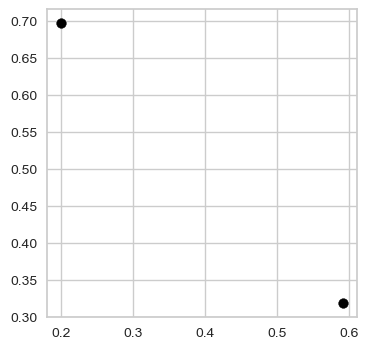

In [54]:
plt.figure(figsize=(4, 4))
plt.scatter(centers_AS[:, 0], centers_AS[:, 1], c="black");

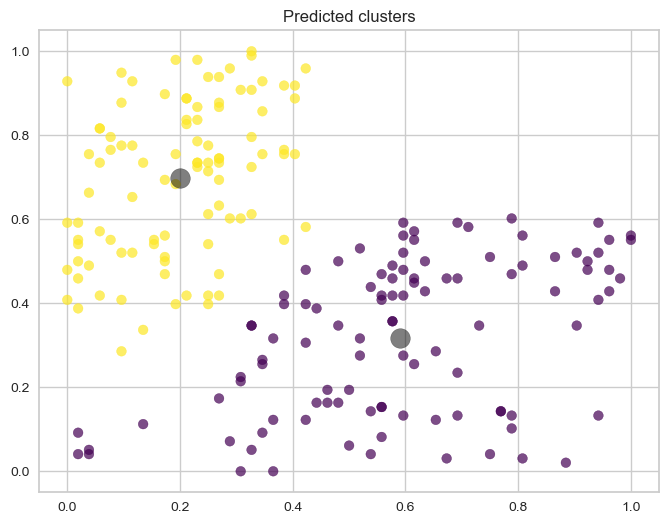

In [55]:
plt.figure(figsize=(8, 6))
plt.scatter(
    X_AS["age"],
    X_AS["spending_score"],
    c=X_AS.predicted_clusters,
    cmap="viridis",
    alpha=0.7,
)
plt.scatter(centers_AS[:, 0], centers_AS[:, 1], c="black", s=200, alpha=0.5)
plt.title("Predicted clusters");

### Clustering based on Age and Spending Score - 6 Clusters

In [56]:
X_AS_6Clus = X_scaled[['age', 'spending_score']]

In [57]:
X_AS_6Clus.head()

,age,spending_score
0,0.019231,0.387755
1,0.057692,0.816327
2,0.038462,0.051020
3,0.096154,0.775510
4,0.250000,0.397959


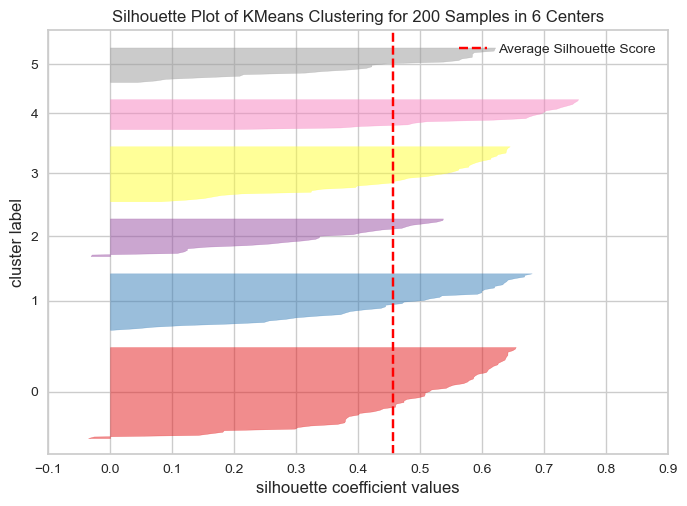

In [58]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model6 = KMeans(n_clusters=6, random_state=42, n_init=10)  # we decided n_clusters=6!
visualizer = SilhouetteVisualizer(model6)

visualizer.fit(X_AS_6Clus)  # Fit the data to the visualizer
visualizer.poof();

# With this feature of yellowbrick, we can see the silhouette scores of each cluster separately.

In [59]:
from sklearn.cluster import KMeans

model_final_AS_6Clus = KMeans(n_clusters=6, random_state=42, n_init=10)  # we decided n_clusters=6

model_final_AS_6Clus.fit(X_AS_6Clus)

KMeans(n_clusters=6, n_init=10, random_state=42)

In [60]:
model_final_AS_6Clus.labels_

array([3, 0, 2, 0, 3, 0, 2, 0, 5, 0, 5, 0, 5, 0, 2, 0, 2, 3, 5, 0, 2, 0,
       5, 0, 5, 0, 1, 0, 2, 0, 5, 0, 5, 0, 5, 0, 2, 0, 2, 0, 4, 0, 1, 3,
       5, 3, 1, 3, 3, 3, 1, 3, 3, 4, 1, 1, 1, 4, 3, 1, 4, 3, 4, 1, 4, 3,
       1, 4, 3, 3, 4, 1, 4, 4, 4, 3, 1, 1, 3, 1, 4, 1, 4, 1, 3, 1, 1, 3,
       3, 1, 4, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 1, 4, 3, 1, 3, 4, 1, 4, 4,
       4, 3, 1, 3, 3, 3, 4, 1, 1, 1, 3, 1, 1, 0, 3, 0, 1, 0, 5, 0, 5, 0,
       3, 0, 2, 0, 5, 0, 2, 0, 5, 0, 3, 0, 2, 0, 1, 0, 2, 0, 2, 0, 5, 0,
       5, 0, 2, 0, 2, 0, 1, 0, 2, 0, 5, 0, 2, 0, 2, 0, 2, 0, 2, 0, 5, 0,
       5, 0, 5, 0, 2, 0, 5, 0, 1, 0, 5, 0, 2, 0, 2, 0, 2, 0, 5, 0, 1, 0,
       2, 0], dtype=int32)

In [61]:
silhouette_score(X_AS_6Clus, model_final_AS_6Clus.labels_)

0.45615225386265235

In [62]:
centers_AS_6Clus = model_final_AS_6Clus.cluster_centers_
centers_AS_6Clus

array([[0.2363103 , 0.8230716 ],
       [0.55925156, 0.4586321 ],
       [0.30153846, 0.15714286],
       [0.12713675, 0.49829932],
       [0.90096154, 0.49846939],
       [0.67056856, 0.13220941]])

In [63]:
X_AS_6Clus["predicted_clusters"] = model_final_AS_6Clus.labels_

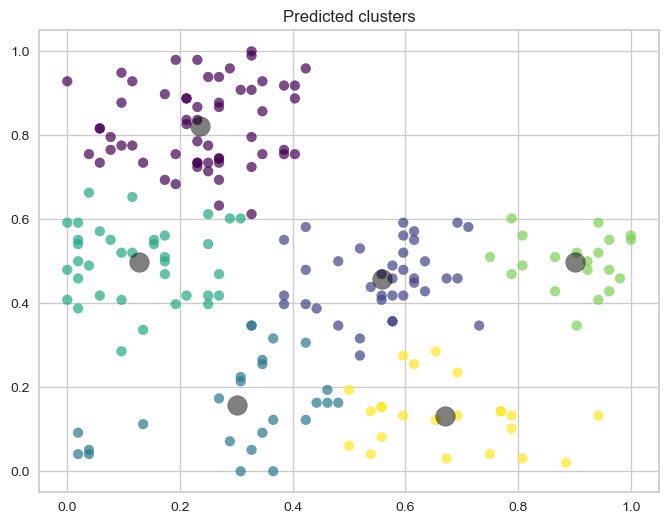

In [64]:
plt.figure(figsize=(8, 6))
plt.scatter(
    X_AS_6Clus["age"],
    X_AS_6Clus["spending_score"],
    c=X_AS_6Clus.predicted_clusters,
    cmap="viridis",
    alpha=0.7,
)
plt.scatter(centers_AS_6Clus[:, 0], centers_AS_6Clus[:, 1], c="black", s=200, alpha=0.5)
plt.title("Predicted clusters");

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [65]:
X_scaled.head()

,age,annual_income,spending_score
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959


In [66]:
X_AIS = X_scaled[['annual_income', 'spending_score']]
X_AIS.head()

,annual_income,spending_score
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


#### *ii. Determine optimal number of clusters*

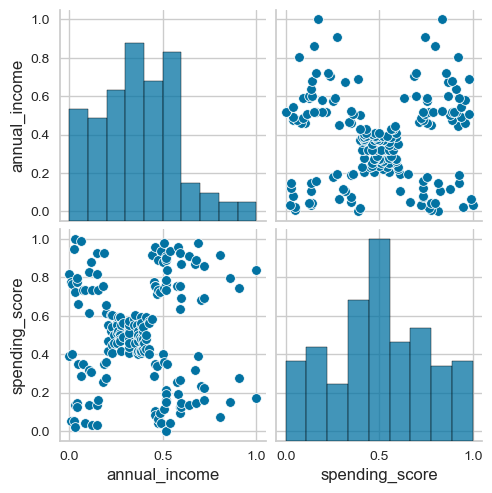

In [67]:
sns.pairplot(X_AIS)
plt.show()

#### Hopkins score 

In [68]:
hopkins(X_AIS, X_AIS.shape[0])

0.2890060685046973

In [69]:
hopkins(X_AIS, 100)

0.2996379263739444

### Elbow Method

In [70]:
ssd = []

K = range(2, 10)

for k in K:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(X_AIS)
    ssd.append(model.inertia_)
    #print(model.labels_)

Text(0.5, 1.0, 'elbow method')

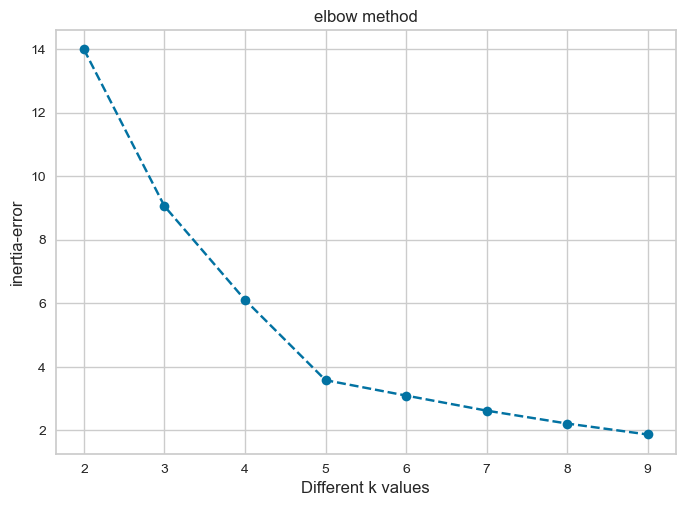

In [71]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")

In [72]:
ssd 

[13.993505283127977,
 9.058985215159455,
 6.110312266413656,
 3.5831179059525606,
 3.098385141882586,
 2.624103948396721,
 2.2180573120830713,
 1.873434667867071]

In [73]:
-pd.Series(ssd).diff()

0         NaN
1    4.934520
2    2.948673
3    2.527194
4    0.484733
5    0.474281
6    0.406047
7    0.344623
dtype: float64

In [74]:
K = range(2, 10)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeanModel.fit(X_AIS)
    distances = kmeanModel.transform(
        X_AIS
    )  # distances from each observation to each cluster centroid
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[
            labels == i, i
        ]  # distances from observations in each cluster to their own centroid
        result.append(
            np.mean(cluster_distances**2)
        )  # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
    distortion.append(
        sum(result)
    )  # sum the means of all clusters and add it to the distortion list

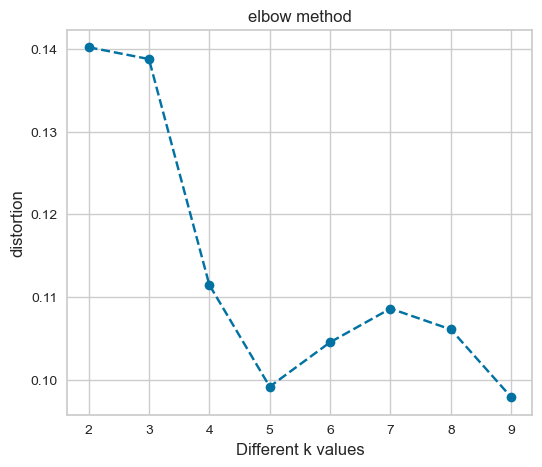

In [75]:
plt.figure(figsize=(6, 5))
plt.plot(K, distortion, "bo--");
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method");

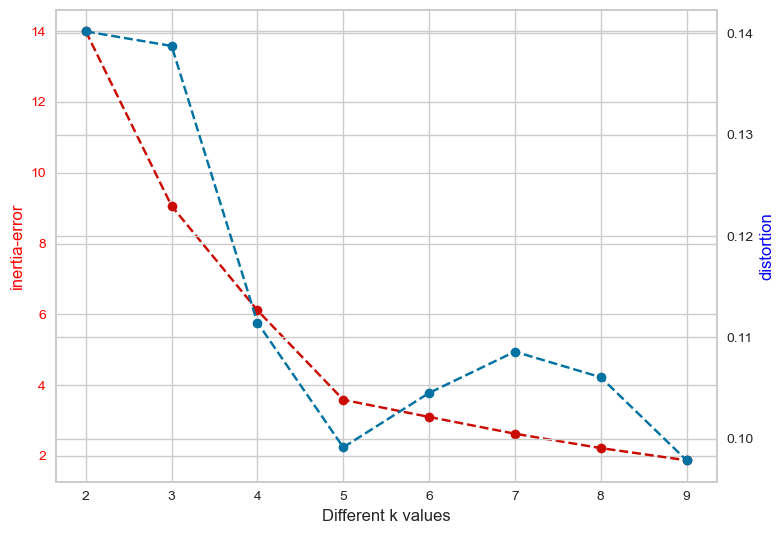

In [76]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Different k values')
ax1.set_ylabel("inertia-error", color='red')
ax1.plot(K, ssd, 'ro--')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("distortion", color='blue')  # we already handled the x-label with ax1
ax2.plot(K, distortion, 'bo--')
ax2.tick_params(axis='y', color='blue')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

### Silhouette analysis

In [77]:
range_n_clusters = range(2, 10)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    kmeans.fit(X_AIS)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_AIS, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.3334020547986479
For n_clusters=3, the silhouette score is 0.45149093095396486
For n_clusters=4, the silhouette score is 0.49620078746385005
For n_clusters=5, the silhouette score is 0.5594854531357838
For n_clusters=6, the silhouette score is 0.5377658513133245
For n_clusters=7, the silhouette score is 0.518791661194564
For n_clusters=8, the silhouette score is 0.4303846185947657
For n_clusters=9, the silhouette score is 0.4435209006595893


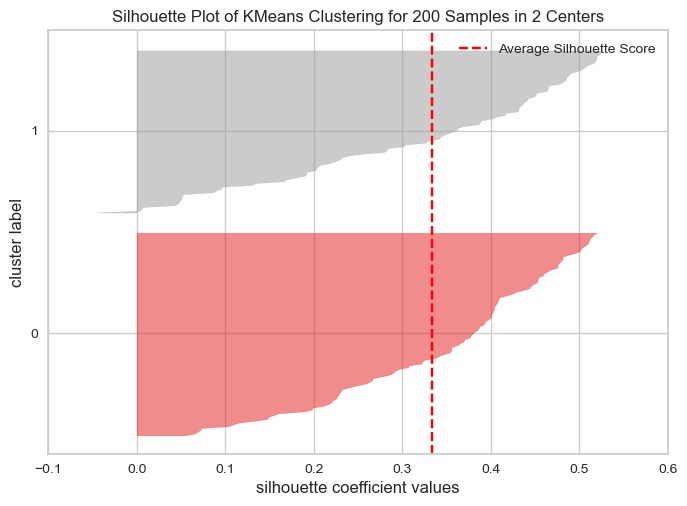

In [78]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model5 = KMeans(n_clusters=2, random_state=42, n_init=10)  # we decided n_clusters=5
visualizer = SilhouetteVisualizer(model5)

visualizer.fit(X_AIS)  # Fit the data to the visualizer
visualizer.poof();

In [79]:
# k = 5 seems okay

#### *iii. Apply K Means*

In [80]:
from sklearn.cluster import KMeans

model_final_AIS = KMeans(n_clusters=5, random_state=42, n_init=10)  # we decided n_clusters=5

model_final_AIS .fit(X_AIS)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [81]:
model_final_AIS.predict(X_AIS)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [82]:
X_AIS["predicted_clusters"] = model_final_AIS.labels_

In [83]:
X_AIS.head()

,annual_income,spending_score,predicted_clusters
0,0.000000,0.387755,2
1,0.000000,0.816327,3
2,0.008197,0.051020,2
3,0.008197,0.775510,3
4,0.016393,0.397959,2


#### *iv. Visualizing and Labeling All the Clusters*

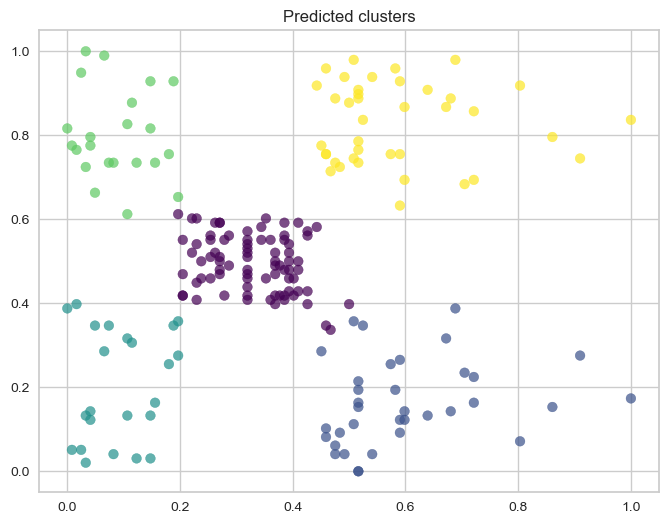

In [84]:
plt.figure(figsize=(8, 6))
plt.scatter(
    X_AIS["annual_income"],
    X_AIS["spending_score"],
    c=X_AIS.predicted_clusters,
    cmap="viridis",
    alpha=0.7,
)
plt.title("Predicted clusters");

In [85]:
centers_AIS = model_final_AIS.cluster_centers_
centers_AIS
# coordinates of centorids

array([[0.33029751, 0.49508692],
       [0.6       , 0.16443149],
       [0.09265859, 0.20319432],
       [0.08792846, 0.79962894],
       [0.58638083, 0.82783883]])

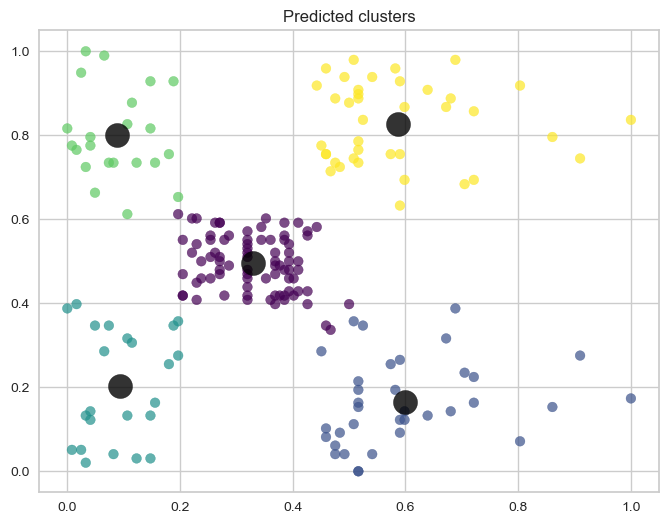

In [86]:
plt.figure(figsize=(8, 6))
plt.scatter(
    X_AIS["annual_income"],
    X_AIS["spending_score"],
    c=X_AIS.predicted_clusters,
    cmap="viridis",
    alpha=0.7,
)
plt.title("Predicted clusters");
plt.scatter(centers_AIS[:, 0], centers_AIS[:, 1], c="black", s=300, alpha=0.8)
plt.title("Predicted clusters");

## Hierarchical Clustering

In [87]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [88]:
X_scaled.head()

,age,annual_income,spending_score
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959


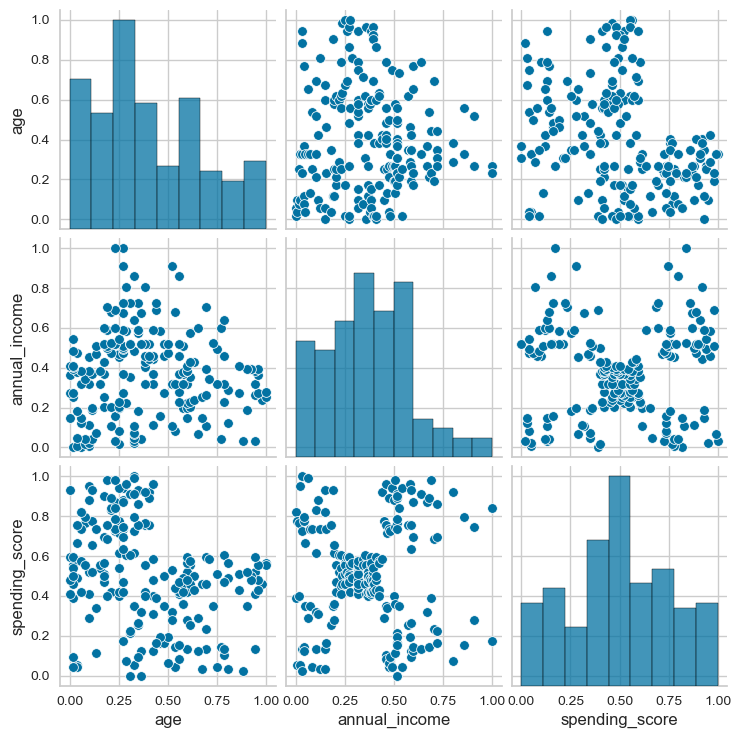

In [89]:
sns.pairplot(X_scaled);

#### Hopkins Test 2nd version
- Hopkins test, a statistical test for randomness of a variable.
- Null Hypothesis (Ho) : Data points are generated by non-random, uniform distribution (implying no meaningful clusters)
- Alternate Hypothesis (Ha): Data points are generated by random data points (presence of clusters)
- The more close 1, the more suitable to have separate clusters.

In [90]:
# function to compute hopkins's statistic for the dataframe X
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform


def hopkins2(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
        X = X.values  # convert dataframe to a numpy array
    # 0.05 (5%) based on paper by Lawson and Jures
    sample_size = int(X.shape[0] * ratio)

    # a uniform random sample in the original data space
    X_uniform_random_sample = uniform(
        X.min(axis=0), X.max(axis=0), (sample_size, X.shape[1]))

    # a random sample of size sample_size from the original data X
    random_indices = sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    # initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs = neigh.fit(X)

    # u_distances = nearest neighbour distances from uniform random sample
    u_distances, u_indices = nbrs.kneighbors(
        X_uniform_random_sample, n_neighbors=2)
    # distance to the first (nearest) neighbour
    u_distances = u_distances[:, 0]

    # w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances, w_indices = nbrs.kneighbors(X_sample, n_neighbors=2)
    # distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[:, 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    # compute and return hopkins' statistic
    H = u_sum / (u_sum + w_sum)
    return H

In [91]:
result=[]
for _ in range(10):
    result.append(hopkins2(X_scaled, 1))
np.mean(result)

0.6944085202600184

Not very low score but we will perform feature engineering

### *i. Determine optimal number of clusters using Dendogram*

In [92]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [93]:
#check the syntax
# scipy.cluster.hierarchy.dendrogram(Z, p=30, truncate_mode=None, color_threshold=None, 
#                                    get_leaves=True, orientation='top', labels=None, count_sort=False, 
#                                    distance_sort=False, show_leaf_counts=True, no_plot=False, no_labels=False, 
#                                    leaf_font_size=None, leaf_rotation=None, leaf_label_func=None,
#                                    show_contracted=False, link_color_func=None, ax=None, above_threshold_color='C0')

# Z (ndarray) : The linkage matrix encoding the hierarchical clustering to render as a dendrogram. 
#See the linkage function for more information on the format of Z.
#--------------------------------------------------------------------------------------------------------
# scipy.cluster.hierarchy.linkage(y, method='single', metric='euclidean', optimal_ordering=False)

# A (n-1) by 4 matrix Z is returned. At the i-th iteration, clusters with indices Z[i, 0] and Z[i, 1] are combined 
# to form cluster n+i. A cluster with an index less than n corresponds to one of the 
# n original observations. The distance between clusters Z[i, 0] and Z[i, 1] is given by Z[i, 2]. 
# The fourth value Z[i, 3] represents the number of original observations in the newly formed cluster.

In [94]:
hc_ward = linkage(y=X_scaled, method="ward")
hc_complete = linkage(X_scaled, "complete")
hc_average = linkage(X_scaled, "average")
hc_single = linkage(X_scaled, "single")

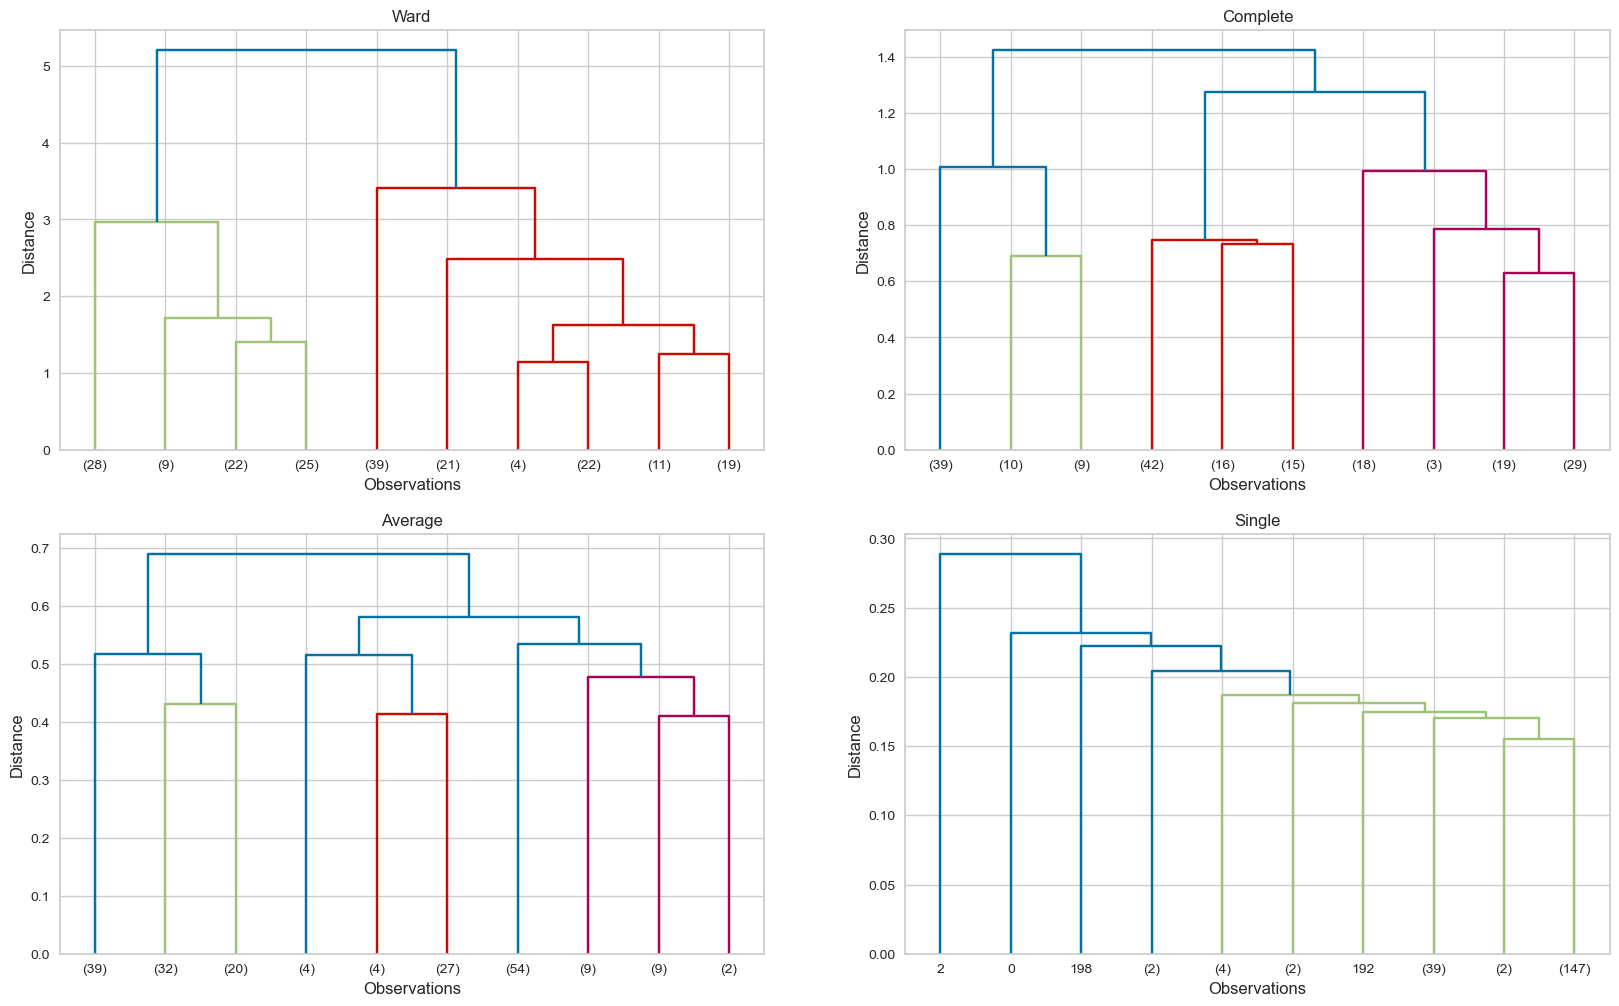

In [95]:
plt.figure(figsize=(20, 12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size=10, truncate_mode='lastp', p=10);

Ward seems good with 2 or 5 clusters I will check this after feature engineering

In [96]:
X_scaled_2 = X_scaled.copy()

#### Agglomerative Clustering

In [97]:
# sklearn.cluster.AgglomerativeClustering(n_clusters=2, *, affinity='deprecated', metric=None, memory=None, 
#                                         connectivity=None, compute_full_tree='auto', linkage='ward', 
#                                         distance_threshold=None, compute_distances=False

In [98]:
model_Hfirst = AgglomerativeClustering(n_clusters=2,
                                metric="euclidean",
                                linkage="ward")

In [99]:
model_Hfirst.fit_predict(X_scaled_2)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

In [100]:
X_scaled_2["predicted_clusters"] = model_Hfirst.labels_

In [101]:
clus_pred = X_scaled_2.groupby("predicted_clusters").mean().T
clus_pred

predicted_clusters,0,1
age,0.218004,0.653617
annual_income,0.354720,0.399297
spending_score,0.625880,0.331025


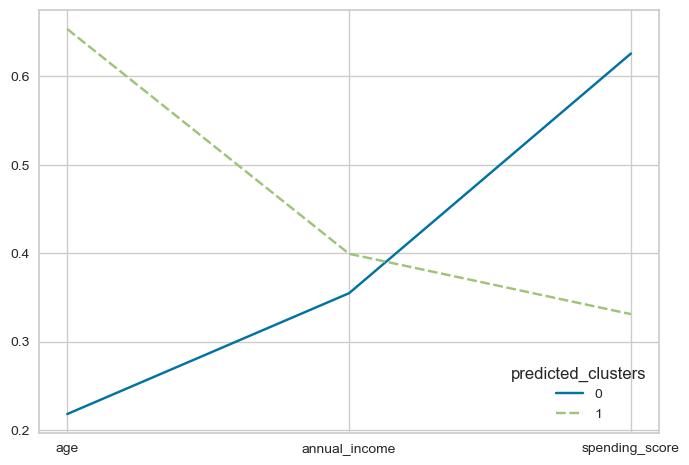

In [102]:
sns.lineplot(data=clus_pred);

age and spending score is very distinctive

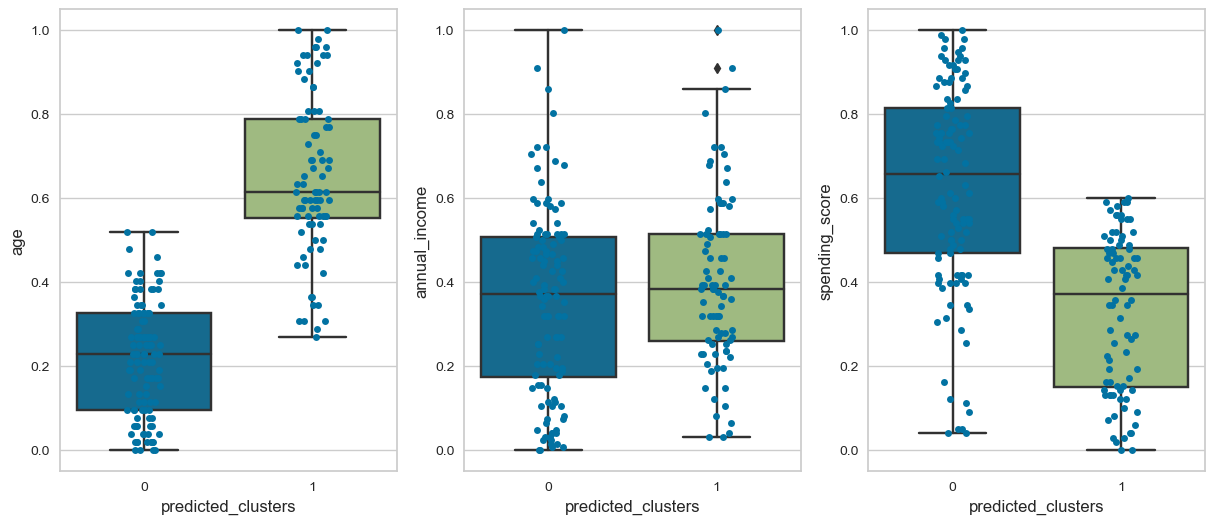

In [103]:
plt.figure(figsize=(20,6))

plt.subplot(141)
sns.boxplot(y="age", x="predicted_clusters", data=X_scaled_2)
sns.stripplot(y="age", x="predicted_clusters", data=X_scaled_2)

plt.subplot(142)
sns.boxplot(y="annual_income", x="predicted_clusters", data=X_scaled_2)
sns.stripplot(y="annual_income", x="predicted_clusters", data=X_scaled_2)

plt.subplot(143)
sns.boxplot(y="spending_score", x="predicted_clusters", data=X_scaled_2)
sns.stripplot(y="spending_score", x="predicted_clusters", data=X_scaled_2)
plt.show();

Consider combinations (age, spending_score) and (annula_income, spending_score)

## Clustering based on Age and Spending Score- x1

In [104]:
X_AS2 = X_scaled[['age','spending_score']]

### Hopkins Score

In [105]:
result=[]
for _ in range(10):
    result.append(hopkins2(X_AS2, 1))
np.mean(result)
#it seems this computation is similar the above - good!

0.6874889714977674

### Silhouette Score

In [106]:
from sklearn.metrics import silhouette_score

In [107]:
K = range(2, 9)

for k in K:
    model = AgglomerativeClustering(n_clusters=k,metric="euclidean",linkage="ward")
    model.fit(X_AS2)
    print(
        f'Silhouette Score for {k} clusters: {silhouette_score(X_AS2, model.labels_)}')


Silhouette Score for 2 clusters: 0.41699937625242867
Silhouette Score for 3 clusters: 0.4171245766527479
Silhouette Score for 4 clusters: 0.38986443147481753
Silhouette Score for 5 clusters: 0.3766824104633079
Silhouette Score for 6 clusters: 0.39920932010291077
Silhouette Score for 7 clusters: 0.35892982172762045
Silhouette Score for 8 clusters: 0.3611306861915168


2 or 3 or 6 clusters seem best option

###  Determine optimal number of clusters using Dendogram- Age and Spending Score

In [108]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [109]:
hc_ward = linkage(y=X_AS2, method="ward")
hc_complete = linkage(X_AS2, "complete")
hc_average = linkage(X_AS2, "average")
hc_single = linkage(X_AS2, "single")

In [110]:
#hc_ward #check what is returned

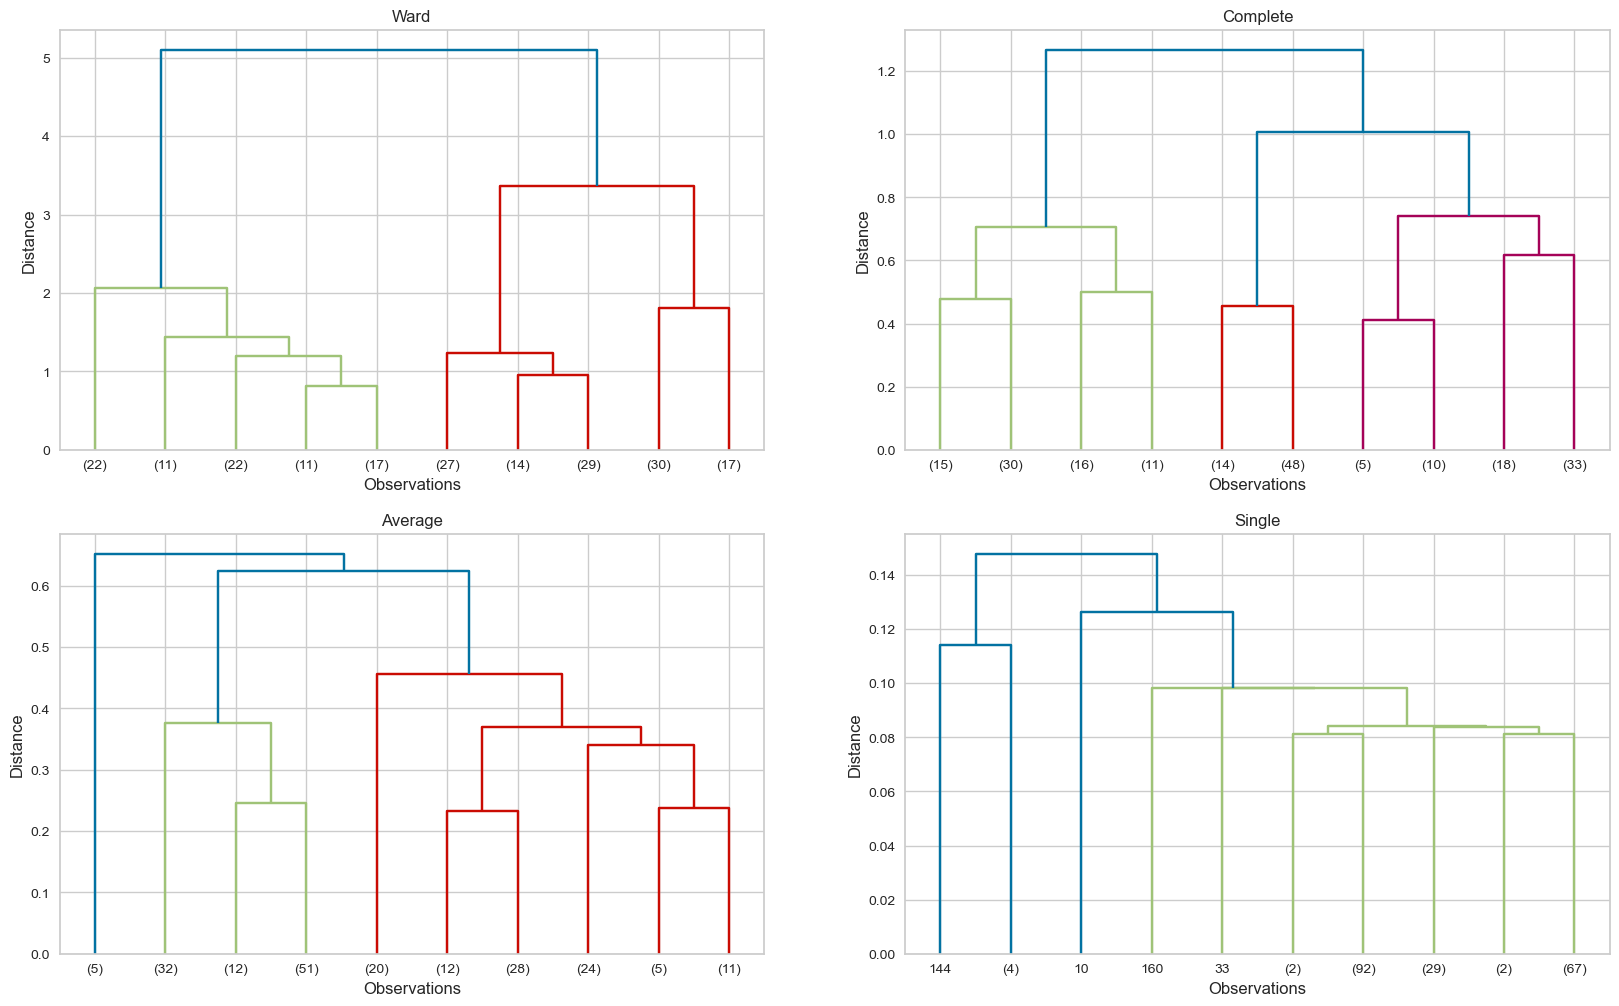

In [111]:
plt.figure(figsize=(20, 12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size=10, truncate_mode='lastp', p=10);

Ward with 2 or 3 clusters seem best option

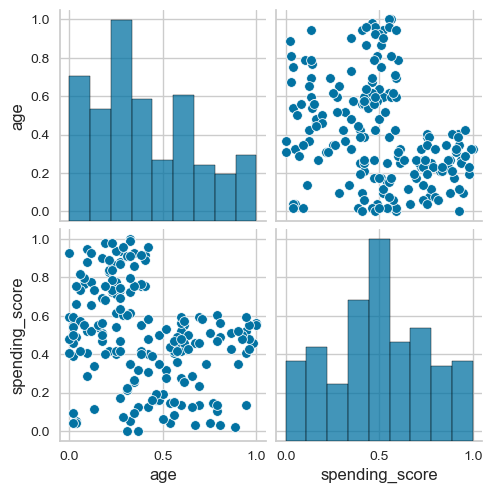

In [112]:
sns.pairplot(X_AS2);

choose 2 clusters

### Apply Agglomerative Clustering

In [113]:
model_HAS = AgglomerativeClustering(n_clusters=2,
                                metric="euclidean",
                                linkage="ward")

In [114]:
model_HAS.fit(X_AS2)

AgglomerativeClustering(metric='euclidean')

In [115]:
model_HAS.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0])

In [116]:
#same thing can be done by fit_predict
model_HAS.fit_predict(X_AS2)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0])

## Clustering based on Age and Spending Score with 6 clusters

In [117]:
model_HAS_6Clas = AgglomerativeClustering(n_clusters=6,
                                metric="euclidean",
                                linkage="ward")

In [118]:
X_AS2_6Clas = X_scaled[['age','spending_score']]

In [119]:
model_HAS_6Clas.fit(X_AS2_6Clas)

AgglomerativeClustering(metric='euclidean', n_clusters=6)

In [120]:
model_HAS_6Clas.fit_predict(X_AS2_6Clas)

array([4, 0, 1, 0, 4, 0, 1, 0, 5, 0, 5, 0, 5, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 5, 0, 2, 0, 2, 0, 5, 0, 5, 0, 2, 0, 2, 0, 1, 0, 3, 0, 2, 0,
       2, 0, 2, 4, 4, 4, 2, 0, 0, 3, 2, 2, 2, 3, 4, 2, 3, 4, 3, 3, 3, 4,
       0, 3, 4, 4, 3, 2, 3, 3, 3, 4, 0, 0, 4, 2, 3, 0, 3, 2, 4, 2, 3, 4,
       0, 2, 3, 4, 2, 2, 4, 4, 2, 4, 2, 4, 4, 2, 3, 4, 2, 4, 3, 2, 3, 3,
       3, 4, 2, 4, 4, 4, 3, 2, 2, 2, 4, 2, 0, 0, 4, 0, 2, 0, 5, 0, 2, 0,
       4, 0, 1, 0, 2, 0, 1, 0, 5, 0, 4, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       2, 0, 1, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0, 5, 0,
       5, 0, 5, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0, 2, 0, 2, 0,
       1, 0])

In [121]:
silhouette_score(X_AS2_6Clas,model_HAS_6Clas.labels_)

0.39920932010291077

## Clustering based on Annual Income and Spending Score- x2

In [122]:
X_AIS2 = X_scaled[['annual_income','spending_score']]

### Hopkins Score

In [123]:
result=[]
for _ in range(10):
    result.append(hopkins2(X_AIS2, 1))
np.mean(result)

0.7000390393087549

### Silhouette Score

In [124]:
K = range(2, 9)

for k in K:
    model = AgglomerativeClustering(n_clusters=k,metric="euclidean",linkage="ward")
    model.fit(X_AIS2)
    print(
        f'Silhouette Score for {k} clusters: {silhouette_score(X_AIS2, model.labels_)}')


Silhouette Score for 2 clusters: 0.39090074717513923
Silhouette Score for 3 clusters: 0.44796167262713327
Silhouette Score for 4 clusters: 0.4976418540005843
Silhouette Score for 5 clusters: 0.5582698727324803
Silhouette Score for 6 clusters: 0.5296670434401043
Silhouette Score for 7 clusters: 0.4093080258867728
Silhouette Score for 8 clusters: 0.4105512797316959


5 cluster seems very good

###  Determine optimal number of clusters using Dendogram- Income and Spending Score

In [125]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [126]:
hc_ward = linkage(y=X_AIS2, method="ward")
hc_complete = linkage(X_AIS2, "complete")
hc_average = linkage(X_AIS2, "average")
hc_single = linkage(X_AIS2, "single")

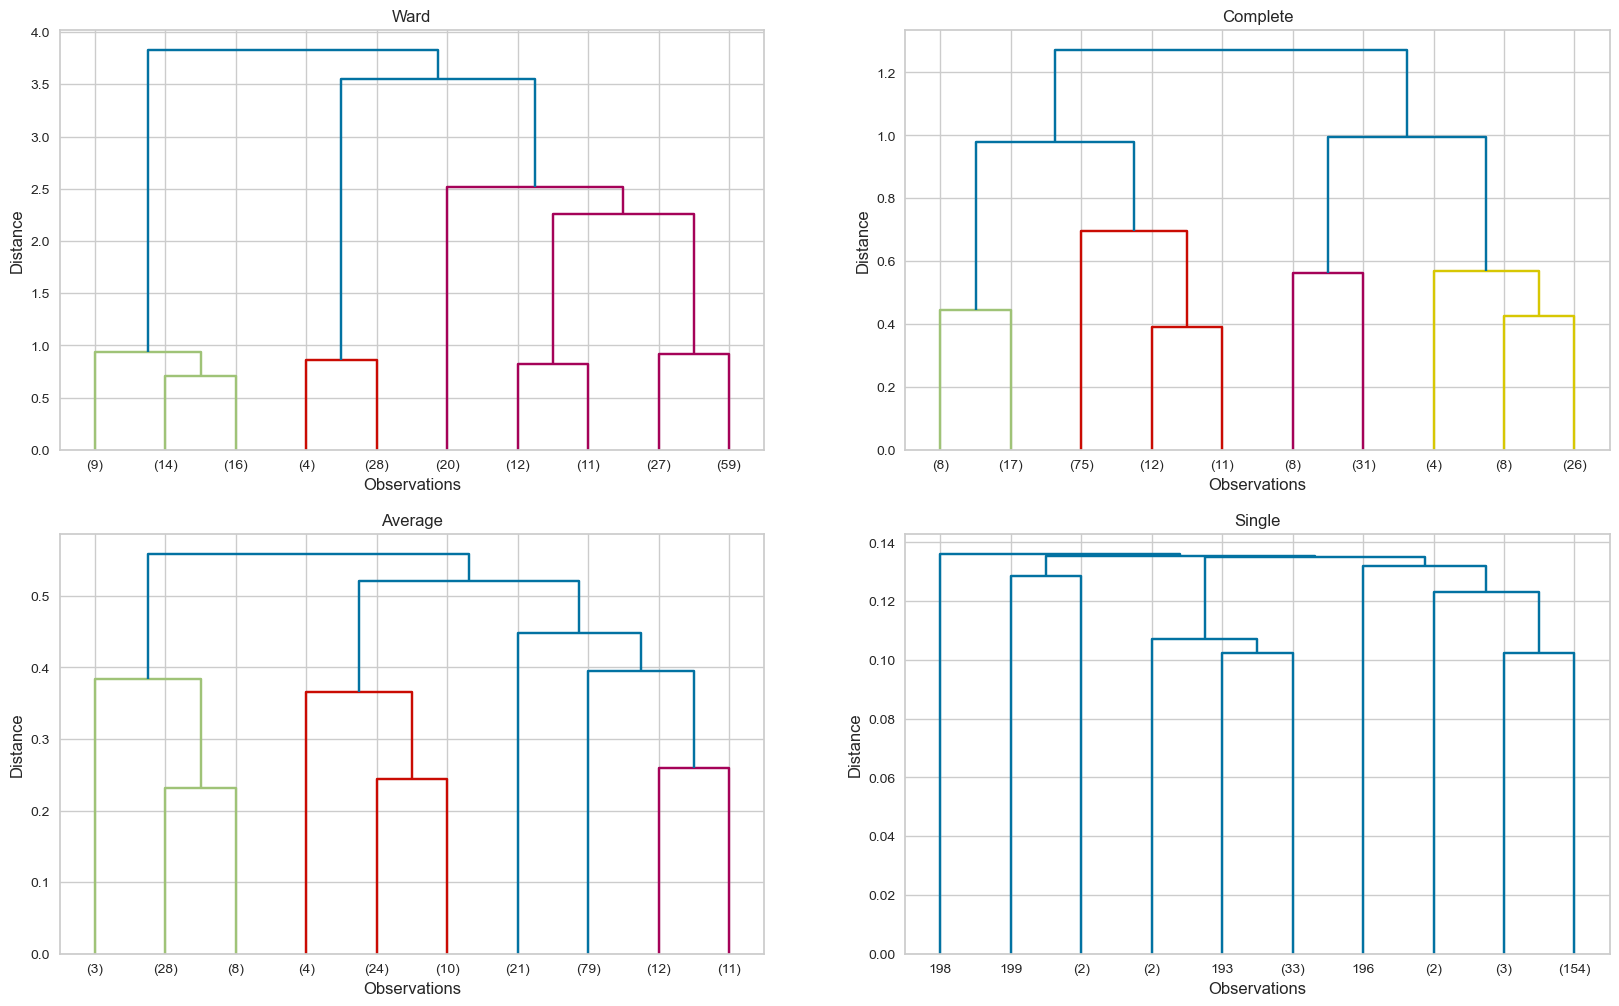

In [127]:
plt.figure(figsize=(20, 12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size=10, truncate_mode='lastp', p=10);

ward with 5 clusters seems best

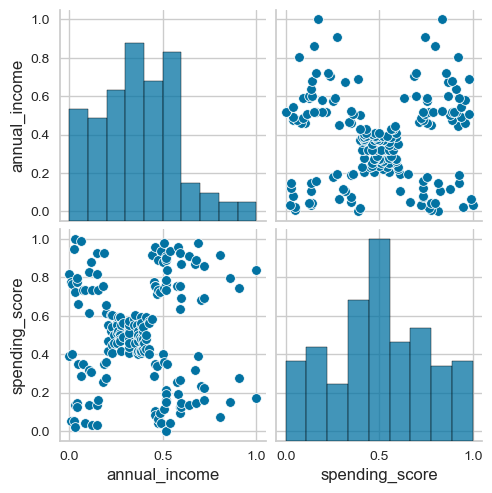

In [128]:
sns.pairplot(X_AIS2);

Choose 5 cluster for modelling

### ii. *Apply Agglomerative Clustering*

In [129]:
from sklearn.cluster import AgglomerativeClustering

In [130]:
model_HAIS = AgglomerativeClustering(n_clusters=5,
                                metric="euclidean",
                                linkage="ward")

In [131]:
model_HAIS.fit(X_AIS2)

AgglomerativeClustering(metric='euclidean', n_clusters=5)

In [132]:
model_HAIS.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 1, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

#### Age and Spending Score- x1- two cluster

In [133]:
silhouette_score(X_AS2, model_HAS.labels_)

0.41699937625242867

#### Age and Spending Score- x1- six cluster

In [134]:
silhouette_score(X_AS2_6Clas,model_HAS_6Clas.labels_)

0.39920932010291077

#### Annual Income and Spending Score- x2

In [135]:
silhouette_score(X_AIS2, model_HAIS.labels_)

0.5582698727324803

### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score- x1- two clusters

In [136]:
X_AS2['predicted_clusters'] = model_HAS.labels_

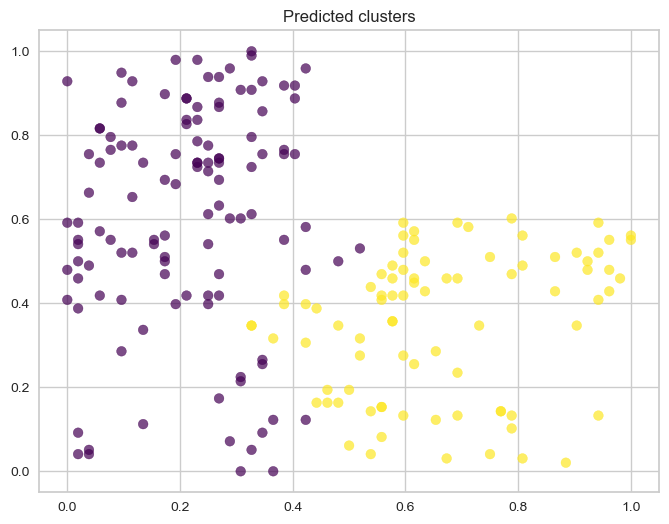

In [137]:
plt.figure(figsize=(8, 6))
plt.scatter(
    X_AS2["age"],
    X_AS2["spending_score"],
    c=X_AS2.predicted_clusters,
    cmap="viridis",
    alpha=0.7,
)
plt.title("Predicted clusters");

#### Age and Spending Score- x1- six clusters

In [138]:
X_AS2_6Clas['predicted_clusters'] = model_HAS_6Clas.labels_

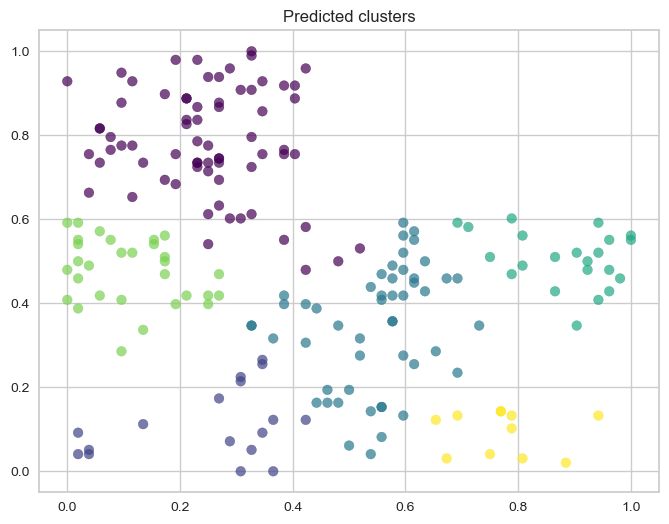

In [139]:
plt.figure(figsize=(8, 6))
plt.scatter(
    X_AS2_6Clas["age"],
    X_AS2_6Clas["spending_score"],
    c=X_AS2_6Clas.predicted_clusters,
    cmap="viridis",
    alpha=0.7,
)
plt.title("Predicted clusters");

#### Annual Income and Spending Score- x2

In [140]:
X_AIS2['predicted_clusters'] = model_HAIS.labels_

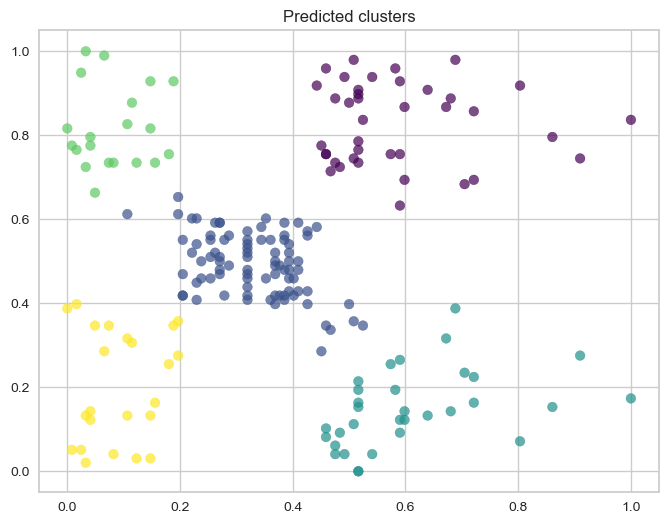

In [141]:
plt.figure(figsize=(8, 6))
plt.scatter(
    X_AIS2["annual_income"],
    X_AIS2["spending_score"],
    c=X_AIS2.predicted_clusters,
    cmap="viridis",
    alpha=0.7,
)
plt.title("Predicted clusters");

### Interpretation based on Age and Spending Score- x1

In [142]:
df_AS = df[['age', 'spending_score']]

In [143]:
df_AS.head(2)

,age,spending_score
0,19,39
1,21,81


##### Choose 6 clusters

In [144]:
df_AS['predicted_clusters'] = X_AS_6Clus.predicted_clusters

In [145]:
df_AS.head(2)

,age,spending_score,predicted_clusters
0,19,39,3
1,21,81,0


#### Add age 

In [146]:
df_income = pd.read_csv("Mall_Customers.csv")
df_AS['annual_income'] = df_income[['Annual Income (k$)']]

In [147]:
df_AS['predicted_clusters'] 

0      3
1      0
2      2
3      0
4      3
      ..
195    0
196    1
197    0
198    2
199    0
Name: predicted_clusters, Length: 200, dtype: int32

#### Scaled with centroids

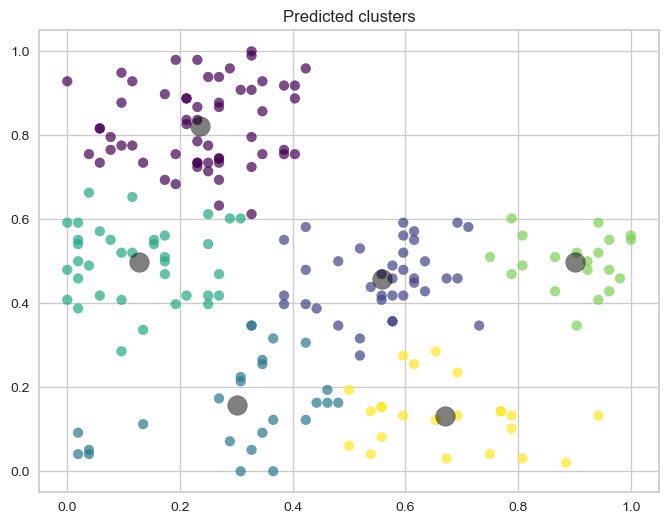

In [148]:
plt.figure(figsize=(8, 6))
plt.scatter(
    X_AS_6Clus["age"],
    X_AS_6Clus["spending_score"],
    c=X_AS_6Clus.predicted_clusters,
    cmap="viridis",
    alpha=0.7,
)
plt.scatter(centers_AS_6Clus[:, 0], centers_AS_6Clus[:, 1], c="black", s=200, alpha=0.5)
plt.title("Predicted clusters");

#### Final Age-Spending Score clusters

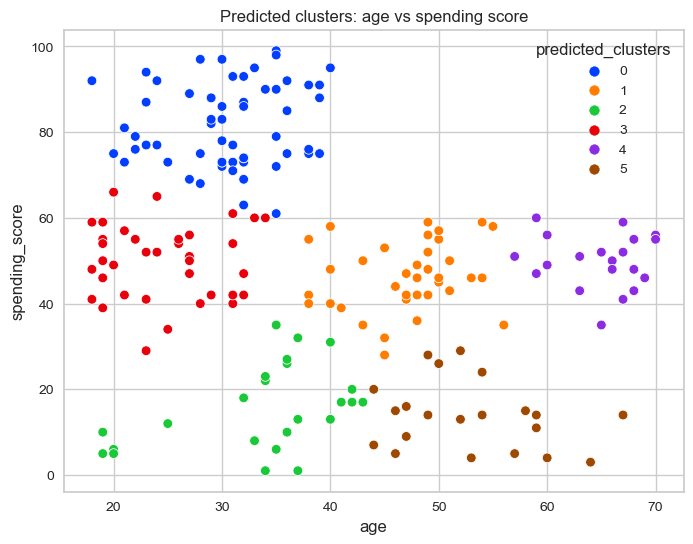

In [149]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data = df_AS, x = "age", y = "spending_score", hue = 'predicted_clusters', palette="bright")
plt.title("Predicted clusters: age vs spending score");

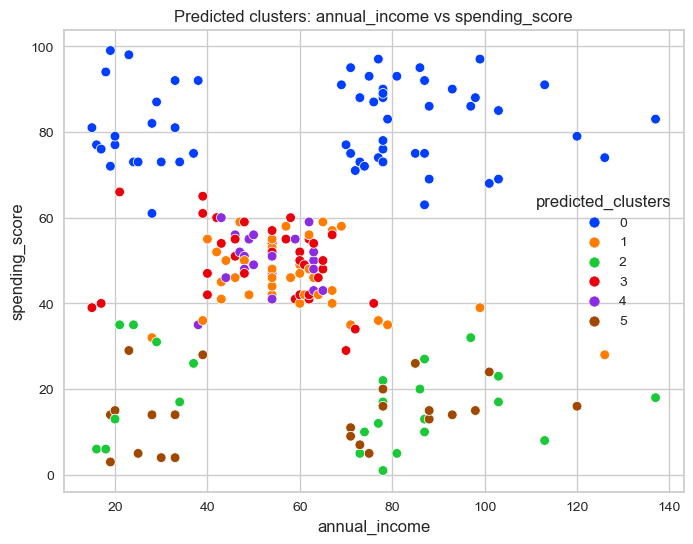

In [150]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data = df_AS, x = "annual_income", y = "spending_score", hue = 'predicted_clusters', palette="bright")
plt.title("Predicted clusters: annual_income vs spending_score");

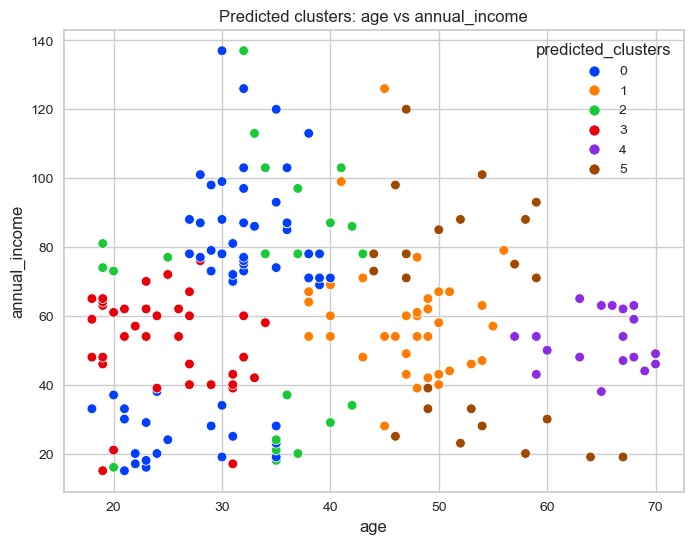

In [151]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data = df_AS, x = "age", y = "annual_income", hue = 'predicted_clusters', palette="bright")
plt.title("Predicted clusters: age vs annual_income");

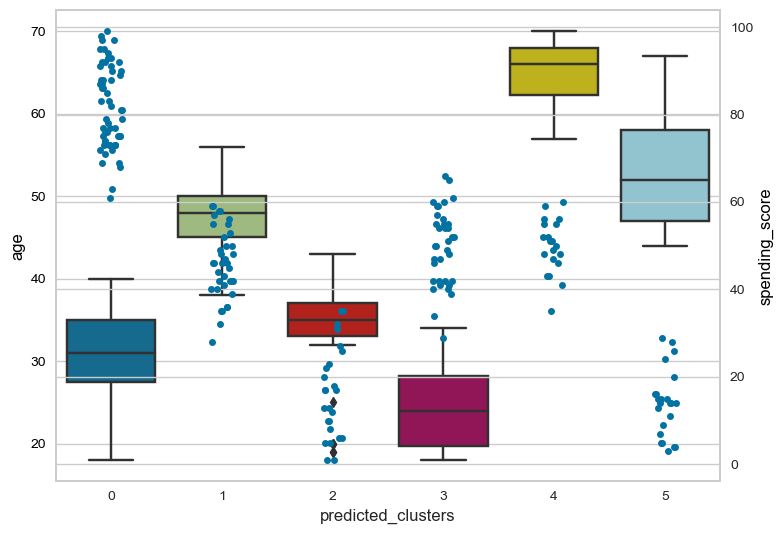

In [152]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('clusters')
ax1.set_ylabel("age", color='black')
sns.boxplot(y="age", x="predicted_clusters", data=df_AS)
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()  

ax2.set_ylabel("spending_score", color='black') 
sns.stripplot(y="spending_score", x="predicted_clusters", data=df_AS)
ax2.tick_params(axis='y', color='black')

fig.tight_layout()  
plt.show()

### Conclusion

**cluster 0** : The average age is around 32, spending_scores are high but annula_income is variying (both low incomers and high incomers exit).

This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss them.    

**cluster 1**: The average age is around 48, both the annula_income and spending_scores are on average.

This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** : The average age is around 37, the annula_income is varying but spending_scores are low. 

It should be researched what can be done to direct to more spending especially high earners.

**cluster 3**: The average age is around 25, the annula_income is low but spending scores are on average. 

This group prioritise spending therefpre more special promotions will be useful. 

**cluster 4**: The average age is around 68, both average annula_income and spending_scores are on average. 

This group consists of our loyal customers. Our company makes profit from this group. Very 
special promotions can be made in order not to keep them with us.

**cluster 5**: The average age is around 63, their annual income is varying but spending_scores are very low. 

#### Interpretation based on Annual Income and Spending Score- x2

In [153]:
df_AnInSped = df[['annual_income', 'spending_score']]

In [154]:
df_AnInSped['predicted_clusters'] = model_final_AIS.labels_

#### Scaled with centroids

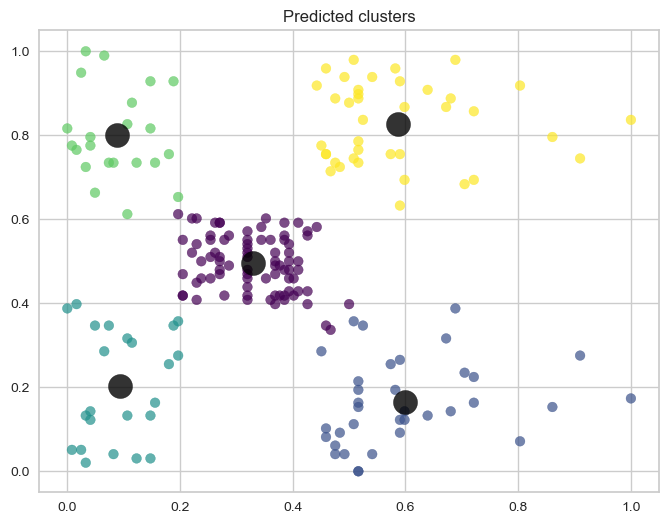

In [155]:
plt.figure(figsize=(8, 6))
plt.scatter(
    X_AIS["annual_income"],
    X_AIS["spending_score"],
    c=X_AIS.predicted_clusters,
    cmap="viridis",
    alpha=0.7,
)
plt.title("Predicted clusters");
plt.scatter(centers_AIS[:, 0], centers_AIS[:, 1], c="black", s=300, alpha=0.8)
plt.title("Predicted clusters");

#### Final Annual Income-Spending score with original scale

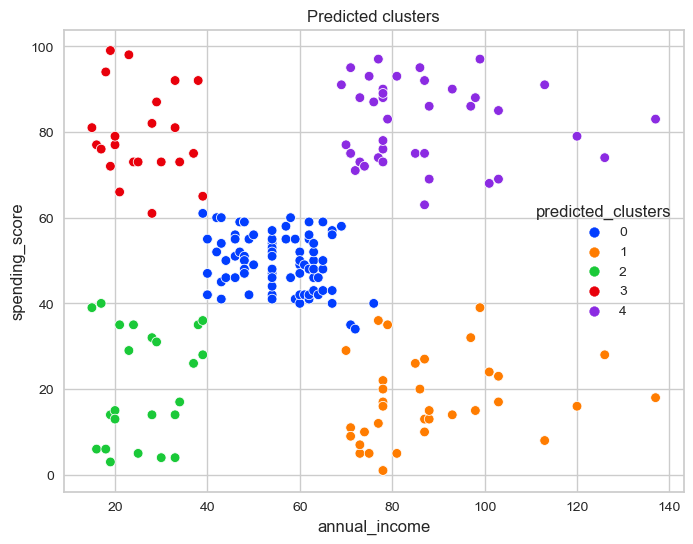

In [156]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data = df_AnInSped, x = "annual_income", y = "spending_score", hue = 'predicted_clusters', palette="bright")
plt.title("Predicted clusters");

#### Add age 

In [157]:
df_age = pd.read_csv("Mall_Customers.csv")

In [158]:
df_AnInSped['age'] = df_age[["Age"]]

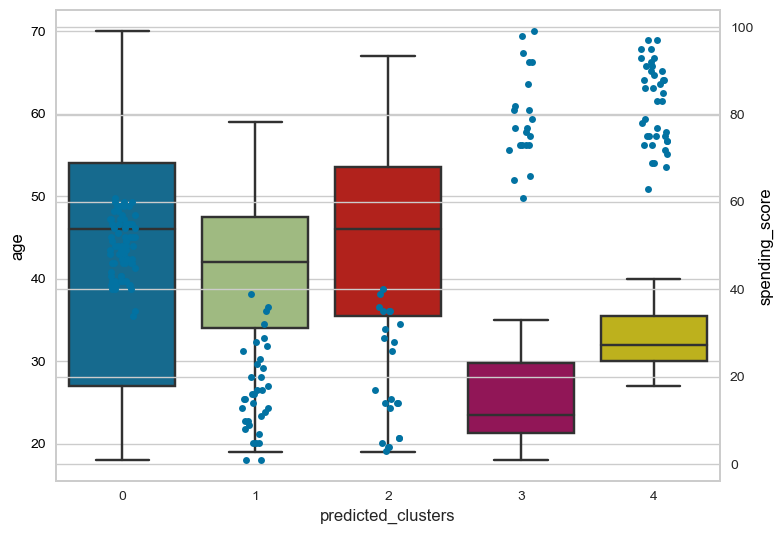

In [159]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('clusters')
ax1.set_ylabel("age", color='black')
sns.boxplot(y="age", x="predicted_clusters", data=df_AnInSped)
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("spending_score", color='black')  # we already handled the x-label with ax1
sns.stripplot(y="spending_score", x="predicted_clusters", data=df_AnInSped)
ax2.tick_params(axis='y', color='black')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

### Conclusions

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this 
group.

#### Add gender and check again

In [160]:
df_Gender = pd.read_csv("Mall_Customers.csv")

In [161]:
df_Gender.head(1)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39


In [162]:
df_AnInSped['gender'] = df_Gender['Gender']
df_AnInSped['age'] = df_Gender['Age']

#### Male

In [163]:
df_AnInSped_Male = df_AnInSped[df_AnInSped['gender'] == 'Male'] 

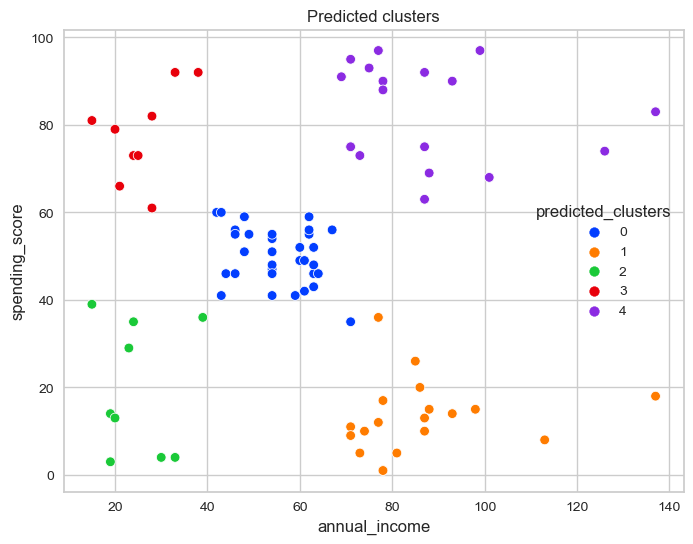

In [164]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data = df_AnInSped_Male, x = "annual_income", y = "spending_score", hue = 'predicted_clusters', palette="bright")
plt.title("Predicted clusters");

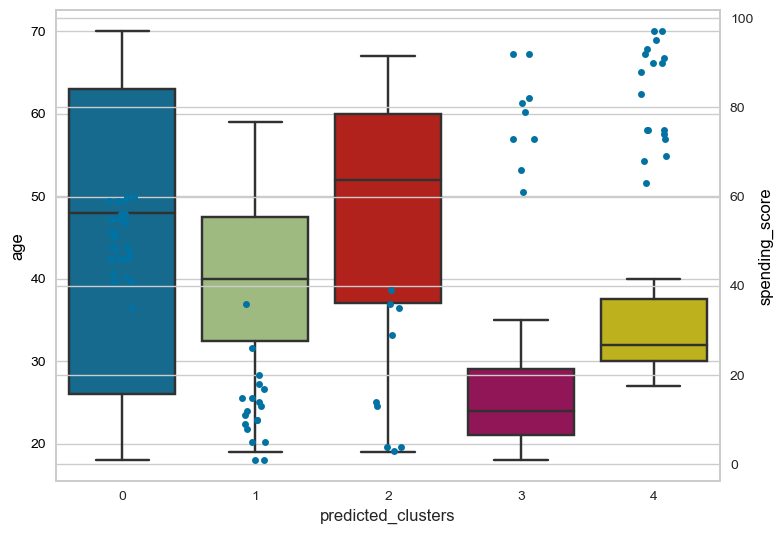

In [165]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('clusters')
ax1.set_ylabel("age", color='black')
sns.boxplot(y="age", x="predicted_clusters", data=df_AnInSped_Male)
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("spending_score", color='black')  # we already handled the x-label with ax1
sns.stripplot(y="spending_score", x="predicted_clusters", data=df_AnInSped_Male)
ax2.tick_params(axis='y', color='black')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

#### Male Conclusion

**cluster 0** : The average age is around 48, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 52. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 33, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

#### Female

In [166]:
df_AnInSped_Female = df_AnInSped[df_AnInSped['gender'] == 'Female'] 

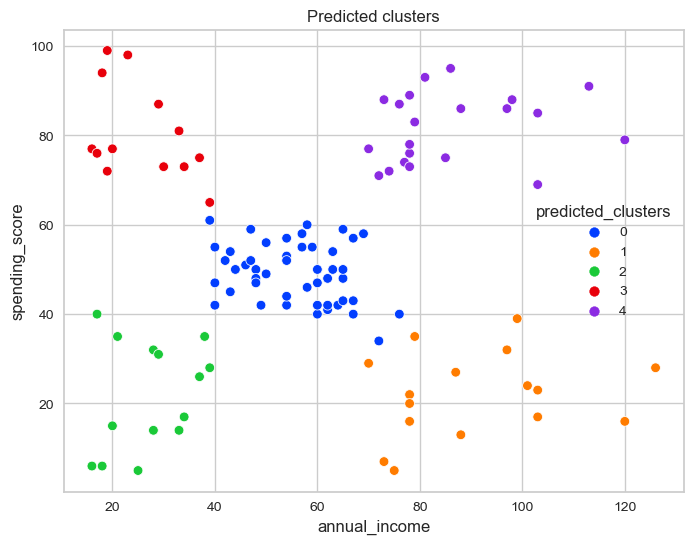

In [167]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data = df_AnInSped_Female, x = "annual_income", y = "spending_score", hue = 'predicted_clusters', palette="bright")
plt.title("Predicted clusters");

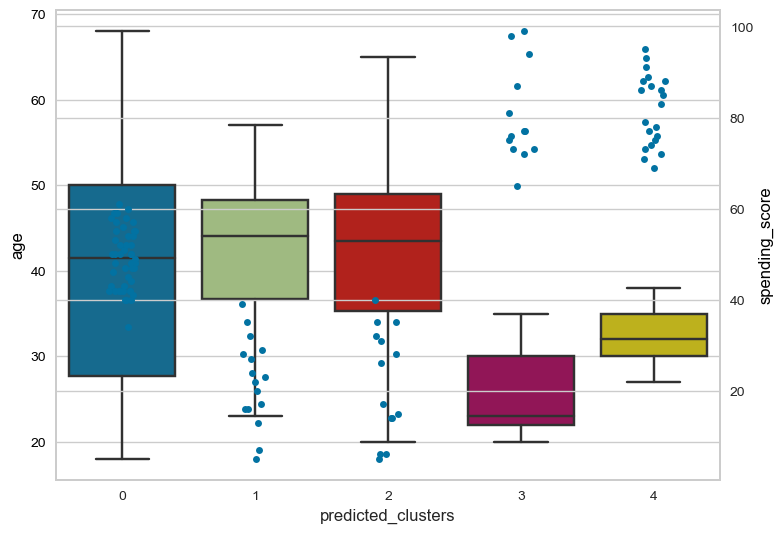

In [168]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('clusters')
ax1.set_ylabel("age", color='black')
sns.boxplot(y="age", x="predicted_clusters", data=df_AnInSped_Female)
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("spending_score", color='black')  # we already handled the x-label with ax1
sns.stripplot(y="spending_score", x="predicted_clusters", data=df_AnInSped_Female)
ax2.tick_params(axis='y', color='black')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

#### Female Conclusion

**cluster 0** : The average age is around 42, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 33, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

#### Conclusions overall 

Both male and female customers have similar spending and income distributions, and cluster structures are preserved. Above strategies should be applied to all custumores without focusing on gender difference. 

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

## Optinal clustering approaches

### DBSCAN

In [169]:
# from sklearn.cluster import DBSCAN 

### GAUSSIAN MIXTURE (Optional)

In [178]:
# from sklearn.mixture import GaussianMixture,BayesianGaussianMixture